# Experiment 3: The Cosine Coefficient

**cosine coefficient**
$$
\frac{\lvert X \cap Y \rvert}{\lvert X \rvert^{1/2} \cdot \lvert Y \rvert^{1/2}}
$$

The cosine coefficient measures the ratio of the number of shared words over the square root of the product of the length of the words in each sentence.

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import exp_libs.word_overlap as wo
import libs.preprocessing as pp
import libs.stats as stats
import libs.utils as utils
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Load Dataset
df_en = pd.read_csv("../../../datasets/final/en/asag_v2_en_filter.csv", sep='~')
print(len(df_en))
df_en.head(2)

2010


ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   
1  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   
1  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   
1  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   
1   To simulate portions of the desired final pro...        5   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1  
1  correct_complete            NaN    5.0             2             1

Stored 'exp3_data' (dict)
             precision    recall  f1-score   support

        0.0       0.04      1.00      0.08        14
        1.0       0.01      0.50      0.01         8
        2.0       0.06      0.17      0.09       234
        3.0       0.02      0.04      0.03       157
        4.0       0.10      0.02      0.03       676
        5.0       1.00      0.02      0.04       921

avg / total       0.50      0.05      0.04      2010

Pearson's R: 0.4023755901117188
Cohen's Kappa: -0.02954262966876975
MAE: 2.4567164179104477
Accuracy: 4.73%
Precision: 50.01%
Recall: 4.73%
F1-Measure: 4.29%


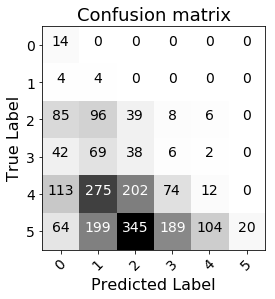

In [3]:
pipeline_phases = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.EN_STOPS),
                    'stemming' : pp.create_stemmer(pp.EN_STEMMER)}

pipeline = pp.create_pipeline(pipeline_phases, pp.whitespace_tokenize)

results = wo.execute_word_overlap_model(df_en, pipeline, wo.cosine_coefficient)

exp3_data = stats.get_all_stats(results['y_true'], results['y_pred'])
%store exp3_data

stats.print_all_stats(results['y_true'], results['y_pred'])
stats.plot_confusion_matrix(stats.cm(results['y_true'], results['y_pred']), classes=np.arange(6))

Stored 'exp3_data_pf' (dict)
             precision    recall  f1-score   support

          0       0.28      0.92      0.42       477
          1       0.91      0.25      0.39      1533

avg / total       0.76      0.41      0.40      2010

Pearson's R: 0.17504267598445974
Cohen's Kappa: 0.09286190520617399
MAE: 0.5532338308457712
Accuracy: 40.80%
Precision: 75.74%
Recall: 40.80%
F1-Measure: 39.88%


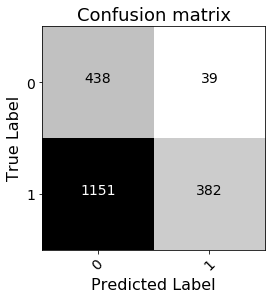

In [4]:
## Pass/Fail Evaluation
yt_pf = utils.convert_to_pass_fail(results['y_pred'])

exp3_data_pf = stats.get_all_stats(df_en['Class2_Score'], yt_pf)
%store exp3_data_pf

stats.print_all_stats(df_en['Class2_Score'], yt_pf)
stats.plot_confusion_matrix(stats.cm(df_en['Class2_Score'], yt_pf), classes=np.arange(2))

### H1 Evaluation:

1. answers which have a lot of tokens in common with model answer have high/correct scores

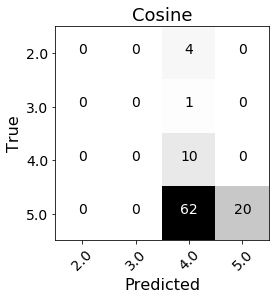

In [7]:
reload(wo)
reload(stats)
idxs = results['y_pred_raw'] > 0.75
klasses = np.unique(results['y_true'][idxs])
stats.plot_confusion_matrix(stats.cm(results['y_true'][idxs], results['y_pred'][idxs]), classes=klasses, title='Cosine', savefile='../renderings/cosine')

In [8]:
reload(wo)
# inspecting false friends i.e. high overlap items which have low scores
idxs2 = np.logical_and(results['y_pred_raw'] > 0.75, results['y_true'] <= 4.0)

wo.inspect_results(df_en, results['y_true'], results['y_pred'], idxs2, results['sets'], size=10)

Prompt:  What is the difference between a data member and a local variable inside a member function? 
Score: 4.0, Score-Pred: 4
MA:  Data members can be accessed from any member functions inside the class definition.  Local variables can only be accessed inside the member function that defines them. 
MA_set: {'data', 'insid', 'local', 'definit', 'class', 'variabl', 'function', 'defin', 'access', 'member'}
SA:  local variables are accessed inside member functions only while data members can be accessed throughout the class 
SA_set: {'insid', 'data', 'local', 'class', 'throughout', 'variabl', 'function', 'access', 'member'}
Prompt:  What is the difference between a data member and a local variable inside a member function? 
Score: 4.0, Score-Pred: 4
MA:  Data members can be accessed from any member functions inside the class definition.  Local variables can only be accessed inside the member function that defines them. 
MA_set: {'data', 'insid', 'local', 'definit', 'class', 'variabl', 'f

#### Reasoning for False Prediction

1. Where ordering matters! Questions which require the student to put a response in a particular order completely fail.

## H2 : Evaluation

1. Do correct answers with different wordings have lower scores?

Short Answer: Yes, the model misses a lot of answers which are correct and use different wordings.

134


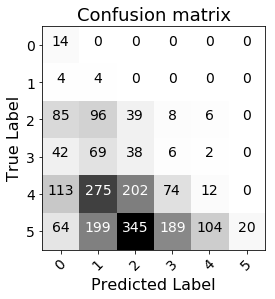

Prompt:  Briefly describe in one sentence how does merge sort work? 
Score: 5.0, Score-Pred: 1
MA:  It splits the original array into two, sorts each of the two halves, and then merges the sorted arrays. 
MA_set: {'merg', 'split', 'origin', 'array', 'two', 'sort', 'halv'}
SA:  divides the line in half coninuously until you get to only a single value then recombine the values to form a sorted line. 
SA_set: {'divid', 'coninu', 'get', 'line', 'half', 'valu', 'recombin', 'singl', 'sort', 'form'}
Prompt:  What is a queue? 
Score: 5.0, Score-Pred: 0
MA:  A data structure that stores elements following the first in first out principle.  The main operations in a queue are enqueue and dequeue. 
MA_set: {'data', 'structur', 'first', 'follow', 'queue', 'oper', 'main', 'element', 'dequeu', 'store', 'principl', 'enqueu'}
SA:  its a lot like a stack, except that the first item put into the list is the first item to be taken from the list. 
SA_set: {'list', 'first', 'like', 'stack', 'lot', 'item', '

In [9]:
idxs3 = np.logical_and(results['y_pred_raw'] < 0.2, results['y_true'] > 4.0)
print(len(df_en[idxs3]))
cm3 = stats.cm(results['y_true'], results['y_pred'])
stats.plot_confusion_matrix(cm3, classes=np.arange(6))

wo.inspect_results(df_en, results['y_true'], results['y_pred'], idxs3, results['sets'], size=10)

## How much of difference does stopword Removal Make?

             precision    recall  f1-score   support

        0.0       0.08      0.93      0.15        14
        1.0       0.01      0.62      0.02         8
        2.0       0.07      0.24      0.11       234
        3.0       0.02      0.03      0.02       157
        4.0       0.06      0.01      0.02       676
        5.0       0.79      0.01      0.02       921

avg / total       0.39      0.05      0.03      2010

Pearson's R: 0.4124541259294219
Cohen's Kappa: -0.036465165449868
MAE: 2.2930348258706466
Accuracy: 4.78%
Precision: 39.03%
Recall: 4.78%
F1-Measure: 3.23%


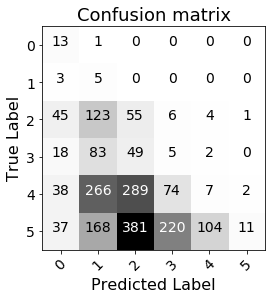

In [10]:
pipeline_phases1 = { 'case_normalization' : pp.case_normalization,
                     'punctuation_removal' : pp.punctuation_removal,
                     'stemming' : pp.create_stemmer(pp.EN_STEMMER)}

pipeline1 = pp.create_pipeline(pipeline_phases1, pp.whitespace_tokenize)

results1 = wo.execute_word_overlap_model(df_en, pipeline1, wo.cosine_coefficient)

stats.print_all_stats(results1['y_true'], results1['y_pred'])
stats.plot_confusion_matrix(stats.cm(results1['y_true'], results1['y_pred']), classes=np.arange(6))

### Results

Removing Stopwords does have an impact on precision. This is due to the fact that in this approach any stopword can only make up at maximum one word in the sentence set of tokens.

## How good is this method for Fill-In-The-Blank Style Questions?

Hypothesis: it should be quite good for short model answers and short student responses, at least compared to longer answers, since FITB type questions usually are all or nothing affairs.

432
             precision    recall  f1-score   support

        0.0       0.12      1.00      0.21        13
        1.0       0.03      0.07      0.04        15
        2.0       0.06      0.18      0.09        33
        3.0       0.00      0.00      0.00         8
        4.0       0.06      0.04      0.05        45
        5.0       1.00      0.39      0.56       318

avg / total       0.75      0.34      0.43       432

Pearson's R: 0.5214813490380135
Cohen's Kappa: 0.11936021896249416
MAE: 1.8240740740740742
Accuracy: 33.80%
Precision: 75.17%
Recall: 33.80%
F1-Measure: 43.32%


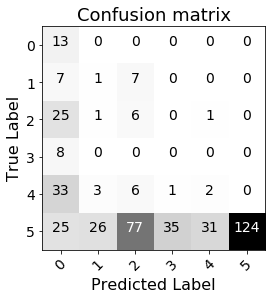

In [11]:
## Load Dataset
df_fitb = pd.read_csv("../../../datasets/final/en/asag_v2_en_fitb.csv", sep='~')
print(len(df_fitb))
df_fitb.head(1)

results_fitb = wo.execute_word_overlap_model(df_fitb, pipeline, wo.cosine_coefficient)

stats.print_all_stats(results_fitb['y_true'], results_fitb['y_pred'])
stats.plot_confusion_matrix(stats.cm(results_fitb['y_true'], results_fitb['y_pred']), classes=np.arange(6))

### Results

It is vastly better at FITB style questions, reaffirming the notion that those questions are fundamentally different than the rest; that is they are in their own category. Whether or not using FITB methods for dealing with such questions is the best approach remains to be seen.

## German Evaluation

2010


ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

             precision    recall  f1-score   support

        0.0       0.02      1.00      0.04        14
        1.0       0.00      0.12      0.00         8
        2.0       0.06      0.11      0.08       234
        3.0       0.01      0.01      0.01       157
        4.0       0.08      0.01      0.01       676
        5.0       1.00      0.01      0.02       921

avg / total       0.49      0.03      0.02      2010

Pearson's R: 0.3410490206960353
Cohen's Kappa: -0.019946337475575948
MAE: 2.9507462686567165
Accuracy: 2.79%
Precision: 49.33%
Recall: 2.79%
F1-Measure: 2.35%


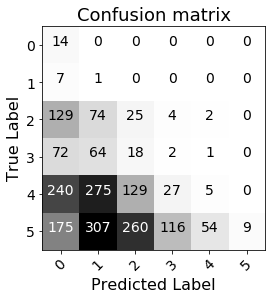

In [12]:
## Load Dataset
df_de = pd.read_csv("../../../datasets/final/de/asag_v2_de_filter.csv", sep='~')
print(len(df_de))
display(df_de.head(1))

pipeline_phases2 = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.DE_STOPS),
                    'stemming' : pp.create_stemmer(pp.DE_STEMMER)}

pipeline2 = pp.create_pipeline(pipeline_phases2, pp.whitespace_tokenize)

results2 = wo.execute_word_overlap_model(df_de, pipeline2, wo.cosine_coefficient)

stats.print_all_stats(results2['y_true'], results2['y_pred'])
stats.plot_confusion_matrix(stats.cm(results2['y_true'], results2['y_pred']), classes=np.arange(6))

## Spanish Evaluation

2010


ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

             precision    recall  f1-score   support

        0.0       0.05      1.00      0.09        14
        1.0       0.00      0.38      0.01         8
        2.0       0.05      0.11      0.06       234
        3.0       0.02      0.03      0.02       157
        4.0       0.06      0.01      0.02       676
        5.0       0.95      0.02      0.04       921

avg / total       0.46      0.04      0.03      2010

Pearson's R: 0.4360409066499334
Cohen's Kappa: -0.03584430980960174
MAE: 2.4895522388059703
Accuracy: 3.63%
Precision: 46.25%
Recall: 3.63%
F1-Measure: 3.42%


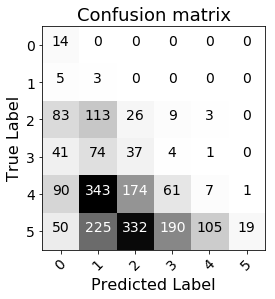

In [13]:
## Load Dataset
df_es = pd.read_csv("../../../datasets/final/es/asag_v2_es_filter.csv", sep='~')
print(len(df_es))
display(df_es.head(1))

pipeline_phases3 = { 'case_normalization' : pp.case_normalization,
                    'punctuation_removal' : pp.punctuation_removal,
                    'remove_stopwords' : pp.create_remove_stopwords(pp.ES_STOPS),
                    'stemming' : pp.create_stemmer(pp.ES_STEMMER)}

pipeline3 = pp.create_pipeline(pipeline_phases3, pp.whitespace_tokenize)

results3 = wo.execute_word_overlap_model(df_es, pipeline3, wo.cosine_coefficient)

stats.print_all_stats(results3['y_true'], results3['y_pred'])
stats.plot_confusion_matrix(stats.cm(results3['y_true'], results3['y_pred']), classes=np.arange(6))